# Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

### print the first 3 rows
### print the number of rows and columns (shape)
### print the column names
### print the data type of each column
### print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [136]:
import pandas as pd
import numpy as np
from pydataset import data
import acquire
import sklearn.impute
import sklearn.model_selection
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import prepare
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

In [2]:
df_iris = data('iris')

In [3]:
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [5]:
#print the column names
list(df_iris.columns)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [6]:
# print the data type of each column
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
# print the summary statistics for each of the numeric variables.
#Would you recommend rescaling the data based on these statistics?

df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


I don't think scaling is needed

## Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx')

In [9]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
customer_id          7049 non-null object
gender               7049 non-null object
is_senior_citizen    7049 non-null int64
partner              7049 non-null object
dependents           7049 non-null object
phone_service        7049 non-null int64
internet_service     7049 non-null int64
contract_type        7049 non-null int64
payment_type         7049 non-null object
monthly_charges      7049 non-null float64
total_charges        7038 non-null float64
churn                7049 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [10]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.iloc[:101,:]

In [11]:
# print the number of rows of your original dataframe
df_excel.shape[0]

7049

In [12]:
df_excel.columns[0]

'customer_id'

In [13]:
# print the first 5 column names
for i in range (0,5): 
    print(df_excel.columns[i])

customer_id
gender
is_senior_citizen
partner
dependents


In [14]:
# print the column names that have a data type of object
df_excel.columns[df_excel.dtypes == object]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [15]:
#compute the range for each of the numeric variables.
mask = ((df_excel.dtypes == float) | (df_excel.dtypes == int))
df_excel.loc[:,mask].columns

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges'],
      dtype='object')

In [16]:
for i in range (0, len(df_excel.columns)):
     if mask[i] == True:
            print(df_excel.iloc[:,i:i+1].max() - df_excel.iloc[:,i:i+1].min())

is_senior_citizen    1
dtype: int64
phone_service    2
dtype: int64
internet_service    2
dtype: int64
contract_type    2
dtype: int64
monthly_charges    100.5
dtype: float64
total_charges    8666.0
dtype: float64


## 3. Read the data from this google sheet into a dataframe, df_google

In [17]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
# print the number of rows and columns
df_google.shape

(891, 12)

In [20]:
#print the column names
list(df_google.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [21]:
# print the data type of each column
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# print the unique values for each of your categorical variables
print(df_google.Survived.unique())
print(df_google.Pclass.unique())
print(df_google.Sex.unique())
print(df_google.SibSp.unique())
print(df_google.Parch.unique())
print(df_google.Embarked.unique())

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


***
# Data Preparation Exercise

In [24]:
df = acquire.get_iris_data()
df.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


In [25]:
#Drop the species_id and measurement_id columns

In [26]:
df = df.drop(columns = ['species_id', 'measurement_id'])

In [27]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [28]:
#Rename the species_name column to just species.
df = df.rename(columns= {'species_name' : 'species'})

In [29]:
#splitting the data in train and test
train, test = sklearn.model_selection.train_test_split(df, random_state=123, train_size=.8)

In [30]:
#Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. 
#How might this be useful?
encoder = sklearn.preprocessing.OneHotEncoder(sparse = False)

#fit the encoder
encoder.fit(train[['species']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [31]:
m = encoder.transform(train[['species']])
cols =  ['species_' + c for c in encoder.categories_[0]]

In [32]:
cols

['species_setosa', 'species_versicolor', 'species_virginica']

In [33]:
train = pd.concat([train, pd.DataFrame(m, columns=cols, index=train.index)], axis =1).drop(columns = 'species')

In [34]:
m = encoder.transform(test[['species']])

In [35]:
test = pd.concat([test, pd.DataFrame(m, columns = cols, index = test.index)], axis =1).drop(columns = 'species')

In [36]:
def drop_columns(df):
    return df.drop(columns = ['species_id', 'measurement_id'])

In [37]:
def rename_columns(df):
    return df.rename(columns = {'species_name' : 'species'})


In [38]:
def encode_iris(train, test):
    encoder = sklearn.preprocessing.OneHotEncoder(sparse = False)
    encoder.fit(train[['species']])
    m = encoder.transform(train[['species']])
    cols =  ['species_' + c for c in encoder.categories_[0]]
    train = pd.concat([train, pd.DataFrame(m, columns=cols, index=train.index)], axis =1).drop(columns = 'species')
    m = encoder.transform(test[['species']])
    test = pd.concat([test, pd.DataFrame(m, columns = cols, index = test.index)], axis =1).drop(columns = 'species')
    return train, test
    

In [39]:
def prep_iris(df):
    df = drop_columns(df)
    df = rename_columns(df)
    train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=123)
    train, test = encode_iris(train, test)
    return train, test

In [40]:
df = acquire.get_iris_data()

In [41]:
train, test = prepare.prep_iris(df)

# Titanic Dataset

In [42]:
df = acquire.get_titanic_data()

In [43]:
#Handle the missing values in the embark_town and embarked columns.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [45]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [46]:
df.embark_town = df.embark_town.fillna('Southampton')

In [47]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [48]:
df.embarked = df.embarked.fillna('S')

In [49]:
#Remove the deck column.
df = df.drop(columns = 'deck')

In [50]:
#Use a label encoder to transform the embarked column.

In [51]:
train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=123)

In [52]:
def label_encoder(train, test):
    encoder = LabelEncoder()
    encoder.fit(train.embarked)
    train.encoded = encoder.transform(train.embarked)
    test.encoded = encoder.transform(test.embarked)
    train_array = np.array(train.encoded).reshape(len(train.encoded),1)
    test_array = np.array(test.encoded).reshape(len(test.encoded),1)
    col_name = 'embarked'
    encoded_values = sorted(list(train[col_name].unique()))

    ohe = OneHotEncoder(sparse=False, categories='auto')
    train_ohe = ohe.fit_transform(train_array)
    test_ohe = ohe.transform(test_array)

        # Turn the array of new values into a data frame with columns names being the values
        # and index matching that of train/test
        # then merge the new dataframe with the existing train/test dataframe
    train_encoded = pd.DataFrame(data=train_ohe,
                            columns=encoded_values, index=train.index)
    train = train.join(train_encoded)

    test_encoded = pd.DataFrame(data=test_ohe,
                                   columns=encoded_values, index=test.index)
    test = test.join(test_encoded)
    return train, test

In [53]:
#Scale the age and fare columns using a min max scaler. 
#Why might this be beneficial? When might you not want to do this?

In [54]:
def scale_minmax(train, test, column_list):
    scaler = MinMaxScaler()
    column_list_scaled = [col + '_scaled' for col in column_list]
    train_scaled = pd.DataFrame(scaler.fit_transform(train[column_list]), 
                                columns = column_list_scaled, 
                                index = train.index)
    train = train.join(train_scaled)

    test_scaled = pd.DataFrame(scaler.transform(test[column_list]), 
                                columns = column_list_scaled, 
                                index = test.index)
    test = test.join(test_scaled)

    return train, test

In [55]:
def impute_titanic(train, test):
    imputer = sklearn.impute.SimpleImputer(strategy='mean')
    imputer.fit(train[['age']])
    train.age = imputer.transform(train[['age']])
    test.age = imputer.transform(test[['age']])
    return train, test

In [56]:
train, test = scale_minmax(train, test, ['age', 'fare'])

In [57]:
df = acquire.get_titanic_data()

In [58]:
def prep_titanic(df):
    df.embark_town = df.embark_town.fillna('Southampton')
    df.embarked = df.embarked.fillna('S')
    df = df.drop(columns = 'deck')
    train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=123)
    train, test = label_encoder(train,test)
    train, test = impute_titanic(train, test)
    train, test = scale_minmax(train, test, ['age', 'fare'])
    return train, test
    
    

In [59]:
df = acquire.get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [60]:
train, test = prepare.prep_titanic(df)

In [61]:
df.sort_values(by = 'fare')

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
271,271,1,3,male,25.0,0,0,0.0000,S,Third,None,Southampton,1
597,597,0,3,male,49.0,0,0,0.0000,S,Third,None,Southampton,1
302,302,0,3,male,19.0,0,0,0.0000,S,Third,None,Southampton,1
633,633,0,1,male,NaN,0,0,0.0000,S,First,None,Southampton,1
277,277,0,2,male,NaN,0,0,0.0000,S,Second,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,438,0,1,male,64.0,1,4,263.0000,S,First,C,Southampton,0
341,341,1,1,female,24.0,3,2,263.0000,S,First,C,Southampton,0
737,737,1,1,male,35.0,0,0,512.3292,C,First,B,Cherbourg,1
258,258,1,1,female,35.0,0,0,512.3292,C,First,None,Cherbourg,1


***
# Classification: Data Exploration

In [169]:
df = acquire.get_iris_data()

In [170]:
train, test = sklearn.model_selection.train_test_split(df, train_size=.7, random_state=123)

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [171]:
train.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
114,3,115,5.8,2.8,5.1,2.4,virginica
136,3,137,6.3,3.4,5.6,2.4,virginica


In [172]:
train = train.drop(columns = ['species_id', 'measurement_id'])

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 114 to 109
Data columns (total 5 columns):
sepal_length    105 non-null float64
sepal_width     105 non-null float64
petal_length    105 non-null float64
petal_width     105 non-null float64
species_name    105 non-null object
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [174]:
train_melt = pd.melt(train[['sepal_length','sepal_width','petal_length', 'petal_width', 'species_name']], "species_name", var_name="measurement")

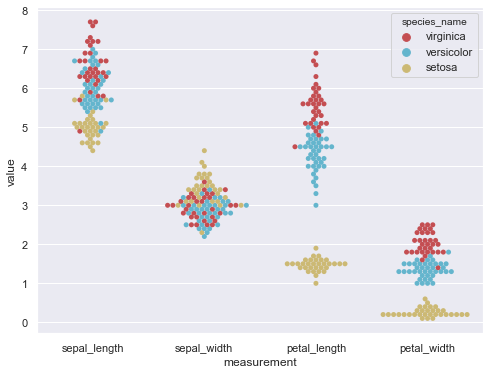

In [175]:
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="species_name",
              palette=["r", "c", "y"], data=train_melt)
plt.show()

Petal length and width are good measures to identify Setosa\
Sepal length and width by themselves are not good for identifiying any species
***



Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width\
petal_length x petal_width\
sepal_area x petal_area\
sepal_length x petal_length\
Make your figure size 14 x 8. What are your takeaways?

In [176]:
train['sepal_area'] = train.sepal_length* train.sepal_width
train['petal_area'] = train.petal_length* train.petal_width

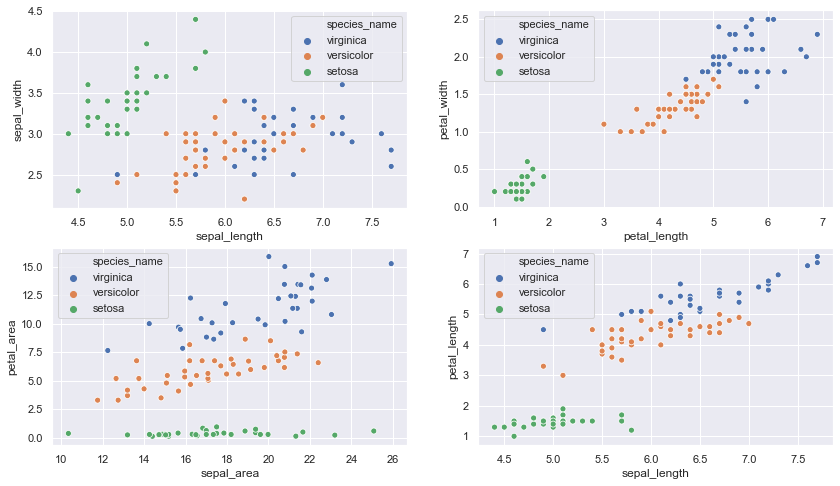

In [177]:
plt.rc('figure', figsize=(14, 8))
plt.rc('font', size=13)

plt.subplot(2,2,1)
sns.scatterplot(x= 'sepal_length', y = 'sepal_width', data = train, hue = 'species_name')

plt.subplot(2,2,2)
sns.scatterplot(x= 'petal_length', y = 'petal_width', data = train, hue = 'species_name')

plt.subplot(2,2,3)
sns.scatterplot(x= 'sepal_area', y = 'petal_area', data = train, hue = 'species_name')

plt.subplot(2,2,4)
sns.scatterplot(x= 'sepal_length', y = 'petal_length', data = train, hue = 'species_name')

Linear relationship between petal width and petal length - Can be used to distinguish Setosa from other species.


In [178]:
train['area_ratio'] = train['sepal_area']/train.petal_area

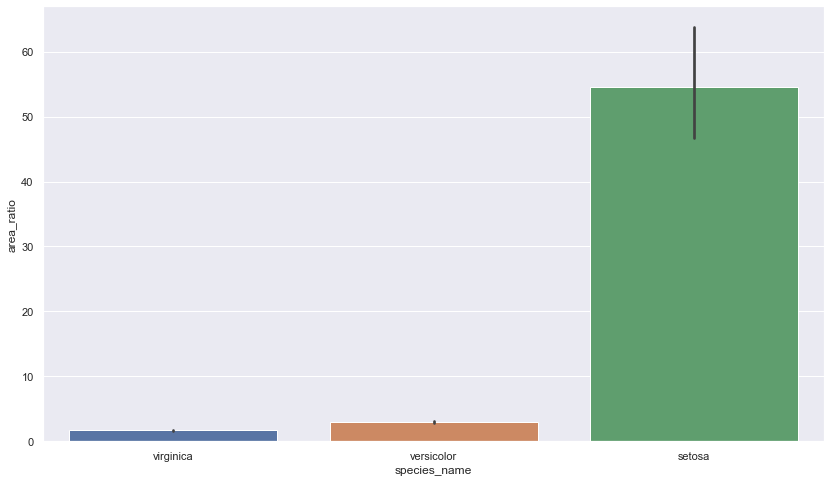

In [179]:
sns.barplot(x= 'species_name', y = 'area_ratio', data = train)

Create a heatmap of each variable layering correlation coefficient on top.

In [180]:
#train = train.drop(columns = ['sepal_area', 'petal_area', 'area_ratio'])

In [181]:
corr = train.corr()

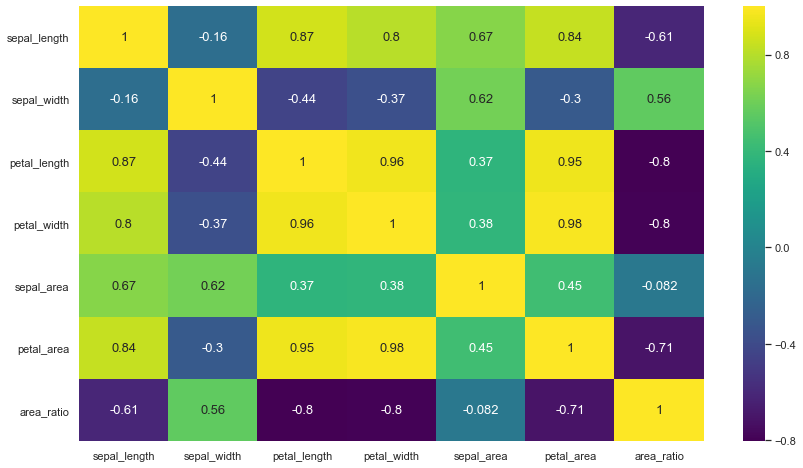

In [182]:
sns.heatmap(corr, annot = True, cmap = 'viridis')

Create a scatter matrix visualizing the interaction of each variable

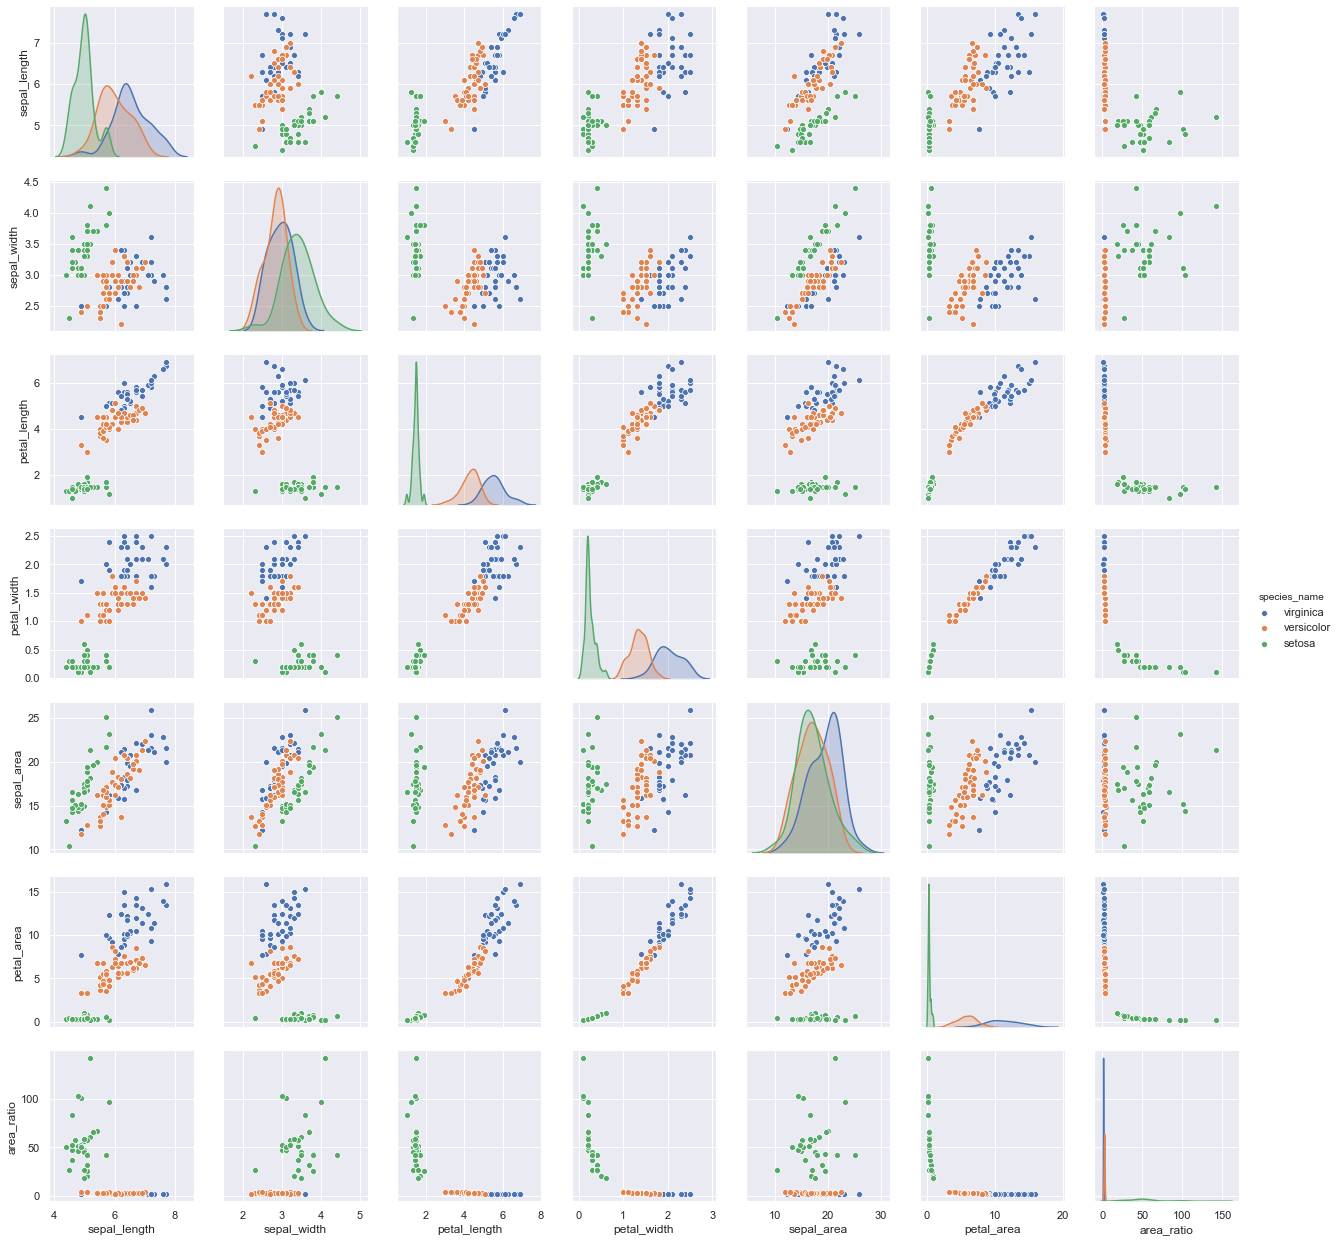

In [183]:
sns.pairplot(train, hue = 'species_name')

Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.\

must include null hypothesis, alternative hypothesis, t-test, results, summary\
H
0
: the difference in sepal length between virginica and versicolor is insignificant.\
H
a
: the difference in sepal length between virginica and versicolor is substantial.\
We will test if the sepal length of virginica is significantly different than that of the versicolor.\
If there is difference, then variable sepal_length is a good choice to keep as a feature.\
We can use a t-test here, as sepal_length is somewhat normally distributed.\

In [163]:
x = train[train.species_name == 'virginica'].sepal_length
y = train[train.species_name == 'versicolor'].sepal_length

In [164]:
t_stat, p = stats.ttest_ind(x, y)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 4.23
p = 6.81e-05


In [165]:
x = train[train.species_name == 'virginica'].petal_width
y = train[train.species_name == 'versicolor'].petal_width

In [166]:
t_stat, p = stats.ttest_ind(x, y)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 12.2
p = 4.1e-19


In [167]:
x = train[train.species_name == 'virginica'].petal_length
y = train[train.species_name == 'versicolor'].petal_length

In [168]:
t_stat, p = stats.ttest_ind(x, y)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 10.8
p = 1.23e-16


In [184]:
x = train[train.species_name == 'virginica'].petal_area
y = train[train.species_name == 'versicolor'].petal_area

In [185]:
t_stat, p = stats.ttest_ind(x, y)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 13.3
p = 6.42e-21
